# Project 1 | Retention Analysis Case Study
-------------------------------------------------------------------------
### Task 1 _ Data Quality Check :
1. Do you have all the relevant fields in the raw data file given to you?


In [20]:
import csv
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
json_data_file = open('retention.json')
rda = json.load(json_data_file) #rda - retention data analysis
json_data_file.close()

In [22]:
type(rda)

dict

In [25]:
rvl = list(rda.values()) #rvl - retention value list

In [26]:
rvl[0]

{'gender': 'M',
 'age': '21 years',
 'gross_income': '$ 79070.91',
 'segment': 'Individuals',
 'num_credit_cards': 0,
 'tiprel_1mes': 'I',
 'ind_actividad_cliente': 0,
 'num_Products': 1,
 'num_loans': 0,
 'duration': 1035}

In [30]:
variable_names= list(rvl[0].keys())

In [31]:
variable_names

['gender',
 'age',
 'gross_income',
 'segment',
 'num_credit_cards',
 'tiprel_1mes',
 'ind_actividad_cliente',
 'num_Products',
 'num_loans',
 'duration']

# Task 1.2 _ Convertion of "json data file" to a "csv file" :

In [34]:
with open('rda.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=variable_names)
    writer.writeheader()
    writer.writerows(rvl)

In [35]:
rda_dataframe = pd.read_csv('rda.csv')

In [36]:
rda_dataframe.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21 years,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23 years,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24 years,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24 years,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31 years,$ 112975.17,Individuals,0,I,0,0,0,376


In [37]:
rda_dataframe_cleaned = rda_dataframe.copy(deep=True)

# Task 1.4 - a & b _ Cleaning age and gross_income columns:
- Converting them to numeric type 

In [38]:
rda_dataframe_cleaned['age'] = rda_dataframe_cleaned['age'].apply(lambda x: int(x.split(" ")[0]))

In [39]:
rda_dataframe_cleaned.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,$ 79070.91,Individuals,0,I,0,1,0,1035
1,M,23,$ 178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,$ 31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,$ 130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,$ 112975.17,Individuals,0,I,0,0,0,376


In [40]:
rda_dataframe_cleaned['gross_income'] = rda_dataframe_cleaned['gross_income'].apply(lambda x: float(x.split(" ")[1]))

In [41]:
rda_dataframe_cleaned.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


# Tasks 1.3 - a _ Identify data type of each variable:

In [42]:
rda_dataframe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int64  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   tiprel_1mes            54030 non-null  object 
 6   ind_actividad_cliente  54030 non-null  int64  
 7   num_Products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


# Checking null values

In [44]:
rda_dataframe_cleaned.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
tiprel_1mes              0
ind_actividad_cliente    0
num_Products             0
num_loans                0
duration                 0
dtype: int64

### ***Nil null values***

# Tasks 1.3 - b _ Numeric summary for the variables which are numeric in nature :

### Min, Max,Mean,25th percentile, Median, 75th percentile can be checked with describe()

In [46]:
rda_dataframe_cleaned.describe()

,age,gross_income,num_credit_cards,ind_actividad_cliente,num_Products,num_loans,duration
count,54030.000000,5.403000e+04,54030.000000,54030.000000,54030.000000,54030.000000,54030.000000
mean,40.772534,1.341967e+05,0.049880,0.469073,1.536017,0.009365,2913.936665
std,17.210781,2.397215e+05,0.217698,0.499047,1.578848,0.096320,2027.956268
min,2.000000,2.336010e+03,0.000000,0.000000,0.000000,0.000000,366.000000
25%,25.000000,6.858107e+04,0.000000,0.000000,1.000000,0.000000,1118.000000
50%,40.000000,1.015663e+05,0.000000,0.000000,1.000000,0.000000,2039.500000
75%,51.000000,1.562538e+05,0.000000,1.000000,2.000000,0.000000,4693.000000
max,112.000000,2.889440e+07,1.000000,1.000000,13.000000,1.000000,7909.000000


### Unique values checking (includes task 1.3 - c) :

In [47]:
rda_dataframe_cleaned.nunique()

gender                       2
age                        110
gross_income             49994
segment                      3
num_credit_cards             2
tiprel_1mes                  2
ind_actividad_cliente        2
num_Products                14
num_loans                    2
duration                  5677
dtype: int64

### Missing values :

In [48]:
rda_dataframe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int64  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   tiprel_1mes            54030 non-null  object 
 6   ind_actividad_cliente  54030 non-null  int64  
 7   num_Products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


### Number of zeros :

In [49]:
list(rda_dataframe_cleaned.describe().columns)

['age',
 'gross_income',
 'num_credit_cards',
 'ind_actividad_cliente',
 'num_Products',
 'num_loans',
 'duration']

In [50]:
(rda_dataframe_cleaned[list(rda_dataframe_cleaned.describe().columns)] == 0).sum()

age                          0
gross_income                 0
num_credit_cards         51335
ind_actividad_cliente    28686
num_Products              9573
num_loans                53524
duration                     0
dtype: int64

### Finding the 90th percentile and 95th percentile :

In [56]:
rda_dataframe_cleaned.quantile([0.9,0.95])

,age,gross_income,num_credit_cards,ind_actividad_cliente,num_Products,num_loans,duration
0.90,65.0,234387.8760,0.0,1.0,3.0,0.0,5844.0
0.95,74.0,310033.3665,0.0,1.0,5.0,0.0,6529.0


### Plots for duration column to check outliers if any :

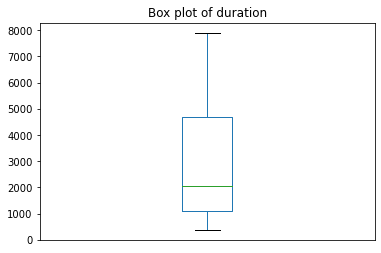

In [57]:
rda_dataframe_cleaned['duration'].plot.box(title="Box plot of duration", xticks=[]);

<AxesSubplot:>

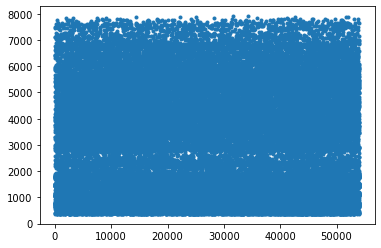

In [58]:
rda_dataframe_cleaned['duration'].plot(style='.')

### Whether close to normal distribution :

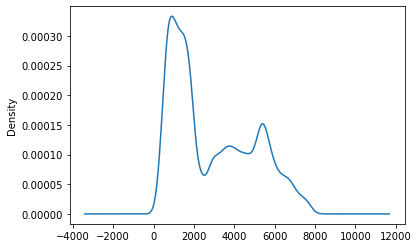

In [61]:
ND = rda_dataframe_cleaned['duration'].plot.kde() #ND ---> Normal Distribution

In [62]:
rda_dataframe_cleaned.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


## Making tiprel_1mes column numeric by replacing A with 1 and 0 with I :

In [63]:
rda_dataframe_cleaned.loc[rda_dataframe_cleaned['tiprel_1mes'] == "I",'tiprel_1mes'] = 0

In [64]:
rda_dataframe_cleaned.loc[rda_dataframe_cleaned['tiprel_1mes'] == "A",'tiprel_1mes'] = 1

In [65]:
rda_dataframe_cleaned.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376


# Task 2 _ Data Exploration and business hypothesis testing :

### Task 2.1 _ For people who were inactive at the start of the study and were active by the time the study ended, is there a pattern in terms of age and gender?

In [68]:
Inactive_to_Active_End = rda_dataframe_cleaned[(rda_dataframe_cleaned['tiprel_1mes'] == 0) & (rda_dataframe_cleaned['ind_actividad_cliente'] == 1) ]

In [69]:
Inactive_to_Active_End.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
9,M,26,27311.31,College_Graduated,0,0,1,1,0,1458
97,F,84,71984.22,Individuals,0,0,1,1,0,2874
119,M,49,314065.11,Individuals,0,0,1,2,0,6418
165,M,25,50303.79,College_Graduated,0,0,1,1,0,1133


In [71]:
Inactive_to_Active_End.count()

gender                   2438
age                      2438
gross_income             2438
segment                  2438
num_credit_cards         2438
tiprel_1mes              2438
ind_actividad_cliente    2438
num_Products             2438
num_loans                2438
duration                 2438
dtype: int64

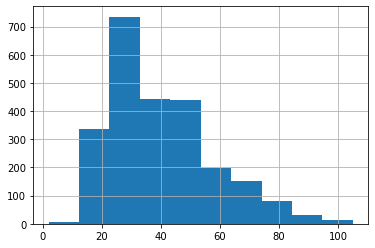

In [76]:
Inactive_to_Active_End['age'].hist()
import seaborn as sns #sns.set_style("whitegrid")

In [77]:
Inactive_to_Active_End.describe()

,age,gross_income,num_credit_cards,ind_actividad_cliente,num_Products,num_loans,duration
count,2438.000000,2.438000e+03,2438.000000,2438.0,2438.000000,2438.0,2438.000000
mean,39.749385,1.230937e+05,0.001641,1.0,1.277276,0.0,2648.244053
std,17.645088,9.329729e+04,0.040480,0.0,0.530003,0.0,1874.054211
min,2.000000,9.049620e+03,0.000000,1.0,0.000000,0.0,366.000000
25%,24.000000,6.711970e+04,0.000000,1.0,1.000000,0.0,1091.000000
50%,37.000000,9.750150e+04,0.000000,1.0,1.000000,0.0,1824.500000
75%,50.000000,1.482009e+05,0.000000,1.0,2.000000,0.0,4283.000000
max,105.000000,1.174394e+06,1.000000,1.0,4.000000,0.0,7879.000000


<AxesSubplot:>

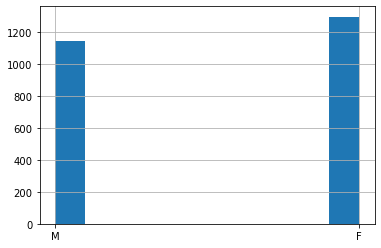

In [78]:
Inactive_to_Active_End['gender'].hist()

In [79]:
Inactive_to_Active_End['gender'].describe()

count     2438
unique       2
top          F
freq      1294
Name: gender, dtype: object

In [80]:
Inactive_to_Active_End_male = Inactive_to_Active_End['gender'] == 'M'

In [81]:
Inactive_to_Active_End_female = Inactive_to_Active_End['gender'] == 'F'

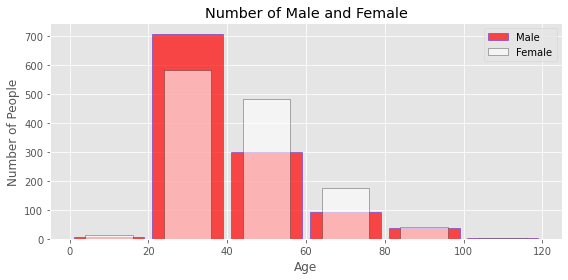

In [87]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [8.0, 4.0]
plt.rcParams["figure.autolayout"] = True
plt.title('Number of Male and Female')
bins = [0,20,40,60,80,100,120]
plt.hist(Inactive_to_Active_End['age'][Inactive_to_Active_End_male], edgecolor='blue',color='red',bins = bins,label='Male',alpha=0.7,rwidth=0.9)
plt.hist(Inactive_to_Active_End['age'][Inactive_to_Active_End_female], edgecolor='black',color='white',bins=bins,label='Female',alpha=0.6,rwidth=0.6)

plt.legend(loc='upper right')

plt.xlabel('Age')
plt.ylabel('Number of People')

plt.tight_layout()

plt.show()

### As per the above analysis there are more people of age between 20 to 40 who were inactive at the start of the study and were active by the time
-----------------------------------------------------------
### Most of them are males from the study.
-----------------------------------------------------------

## Task 2.2 _ Do people with more than average annual income tend to have relatively high :
## Activity rates compared to people with less than average annual income?

In [89]:
rda_dataframe_cleaned.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376


In [96]:
GAI = rda_dataframe_cleaned[rda_dataframe_cleaned['gross_income']>rda_dataframe_cleaned['gross_income'].mean()] #GAI --> Greater Annual Income

In [97]:
GAI.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
7,M,48,184641.60,Individuals,0,1,1,1,0,4066
8,F,36,164347.86,VIP,0,1,1,1,0,1427
10,F,46,256450.32,Individuals,0,0,0,0,0,6766
14,M,40,192617.13,Individuals,1,1,1,1,0,928


In [100]:
LAI = rda_dataframe_cleaned[rda_dataframe_cleaned['gross_income']<=rda_dataframe_cleaned['gross_income'].mean()] #LAI ----> Less Annual Income

In [101]:
LAI.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
5,F,32,37318.56,Individuals,0,1,1,4,0,699


In [102]:
GAI.tiprel_1mes.sum()/GAI.tiprel_1mes.count()

0.5192883366280712

In [103]:
GAI.ind_actividad_cliente.sum()/GAI.ind_actividad_cliente.count()

0.5208133295679187

In [104]:
LAI.tiprel_1mes.sum()/LAI.tiprel_1mes.count()

0.435237439779766

In [105]:
LAI.ind_actividad_cliente.sum()/LAI.ind_actividad_cliente.count()

0.4438540949759119

--------------------------------------------------------------------
### As per the above findings in both at the start and end of the period people with more than average annual _***"Income tend to have relatively high activity rates compared to people with less than average annual income"***_
--------------------------------------------------------------------

### Task 2.3 _ What is the relationship between the number of products owned by customers who were active at the start and at the end vs those who were active at the start but were inactive at the end of the study period?

In [205]:
people_active_at_start_and_end = rda_dataframe_cleaned[(rda_dataframe_cleaned['tiprel_1mes'] == 1) & (rda_dataframe_cleaned['ind_actividad_cliente'] == 1) ]

In [206]:
people_active_at_start_inactive_at_end = rda_dataframe_cleaned[(rda_dataframe_cleaned['tiprel_1mes'] == 1) & (rda_dataframe_cleaned['ind_actividad_cliente'] == 0) ]

In [207]:
people_active_at_start_and_end_products = people_active_at_start_and_end['num_Products'].sum()

In [208]:
people_active_at_start_and_end_products

59112

In [209]:
people_active_at_start_and_end_products/people_active_at_start_and_end['num_Products'].count()

2.580633895049332

In [211]:
people_active_at_start_inactive_at_end_products = people_active_at_start_inactive_at_end['num_Products'].sum()

In [212]:
people_active_at_start_inactive_at_end_products

1635

In [213]:
people_active_at_start_inactive_at_end_products/people_active_at_start_inactive_at_end['num_Products'].count()

0.7793136320305052

### Finding from the above is that 
"***people active at the start and at the end has more number of products than who were active at the start but were inactive at the end of the study period***"

In [214]:
rda_dataframe_cleaned.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376


### Task 2.4 _ How people who display consistent behaviour (active at start and active at end, inactive at start and inactive at end) differ from people who display a change in their behaviour (active at start but inactive at the end or inactive at start but active at end)?

In [217]:
people_inactive_at_start_and_end = rda_dataframe_cleaned[(rda_dataframe_cleaned['tiprel_1mes'] == 0) & (rda_dataframe_cleaned['ind_actividad_cliente'] == 0) ]

In [218]:
people_inactive_at_start_and_end.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
10,F,46,256450.32,Individuals,0,0,0,0,0,6766


In [219]:
people_active_at_start_and_end

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
5,F,32,37318.56,Individuals,0,1,1,4,0,699
7,M,48,184641.60,Individuals,0,1,1,1,0,4066
8,F,36,164347.86,VIP,0,1,1,1,0,1427
11,F,42,133268.46,Individuals,0,1,1,2,0,6446
13,M,33,77878.38,College_Graduated,0,1,1,1,0,766
...,...,...,...,...,...,...,...,...,...,...
54015,M,20,116361.21,College_Graduated,0,1,1,1,0,418
54018,F,78,99018.39,VIP,0,1,1,4,0,4741
54021,M,24,68385.87,College_Graduated,0,1,1,1,0,1838
54022,F,65,266600.04,Individuals,1,1,1,2,0,3722


<AxesSubplot:>

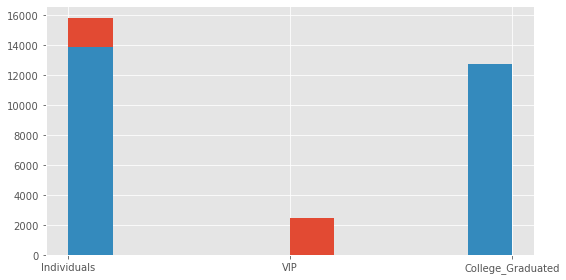

In [220]:
people_active_at_start_and_end['segment'].hist()
people_inactive_at_start_and_end['segment'].hist()

<AxesSubplot:>

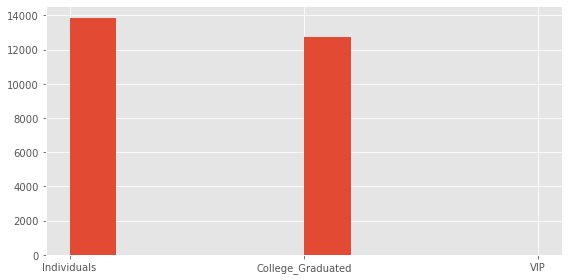

In [221]:
people_inactive_at_start_and_end['segment'].hist()

<AxesSubplot:>

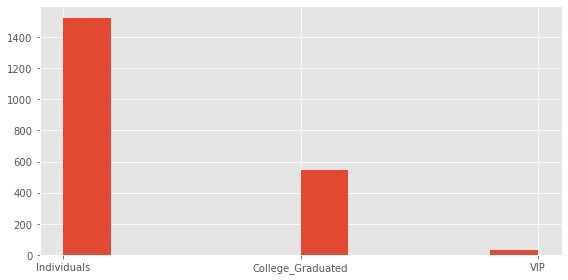

In [222]:
people_active_at_start_inactive_at_end['segment'].hist()

<AxesSubplot:>

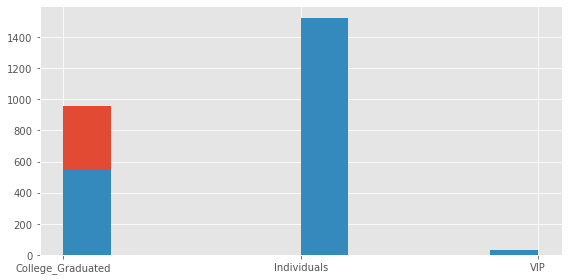

In [223]:
inactive_at_start_and_active_at_end_people['segment'].hist()
people_active_at_start_inactive_at_end['segment'].hist()

In [224]:
people_active_at_start_and_end.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
5,F,32,37318.56,Individuals,0,1,1,4,0,699
7,M,48,184641.60,Individuals,0,1,1,1,0,4066
8,F,36,164347.86,VIP,0,1,1,1,0,1427
11,F,42,133268.46,Individuals,0,1,1,2,0,6446
13,M,33,77878.38,College_Graduated,0,1,1,1,0,766


### From the above plots we can see that, 
"***Consistent people includes more VIP's***"

### Task 2.5 - a _ Active at the start but inactive at the end :

In [236]:
people_active_at_start_inactive_at_end.head()

,gender,age,gross_income,segment,num_credit_cards,tiprel_1mes,ind_actividad_cliente,num_Products,num_loans,duration
6,F,43,131281.50,Individuals,0,1,0,1,0,5022
116,F,43,165731.04,Individuals,0,1,0,3,0,5585
139,M,48,128821.86,Individuals,0,1,0,2,0,4996
140,F,74,113712.18,Individuals,0,1,0,1,0,7256
395,F,38,142501.29,Individuals,0,1,0,1,0,4241


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gross_income'}>,
        <AxesSubplot:title={'center':'num_credit_cards'}>],
       [<AxesSubplot:title={'center':'ind_actividad_cliente'}>,
        <AxesSubplot:title={'center':'num_Products'}>,
        <AxesSubplot:title={'center':'num_loans'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

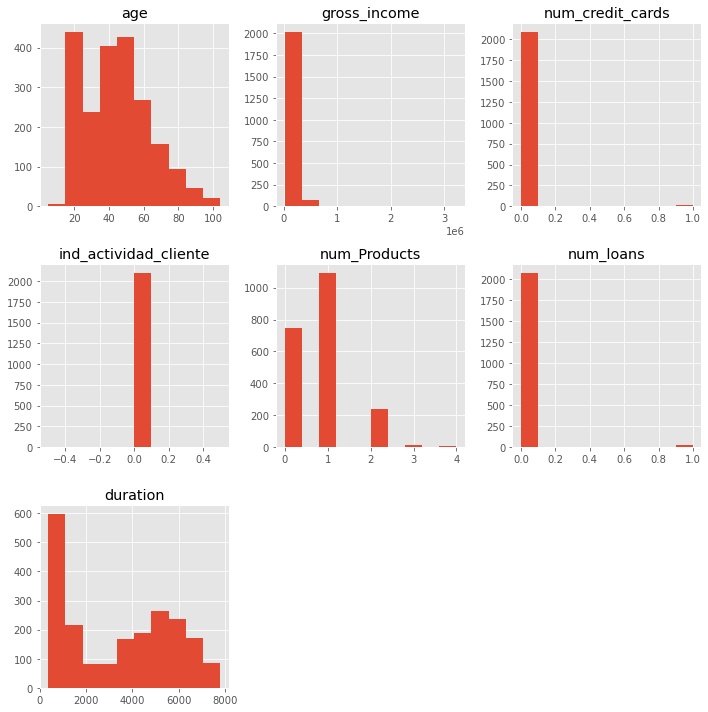

In [237]:
people_active_at_start_inactive_at_end.hist(figsize=(10,10))

### Task 2.5 - b _ Active at the start and active by the end :

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gross_income'}>,
        <AxesSubplot:title={'center':'num_credit_cards'}>],
       [<AxesSubplot:title={'center':'ind_actividad_cliente'}>,
        <AxesSubplot:title={'center':'num_Products'}>,
        <AxesSubplot:title={'center':'num_loans'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

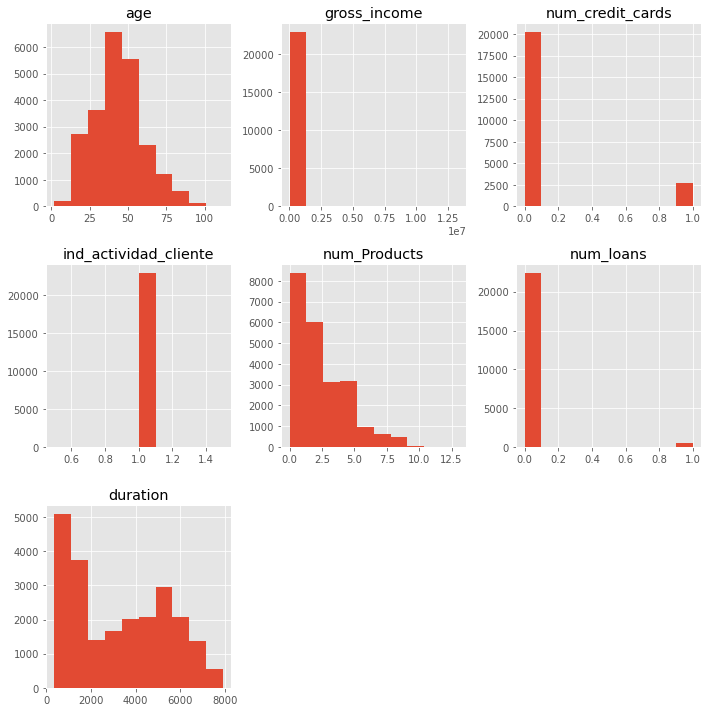

In [238]:
people_active_at_start_and_end.hist(figsize=(10,10))

### Task 2.5 - c _ Inactive at the start but active at the end :

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gross_income'}>,
        <AxesSubplot:title={'center':'num_credit_cards'}>],
       [<AxesSubplot:title={'center':'ind_actividad_cliente'}>,
        <AxesSubplot:title={'center':'num_Products'}>,
        <AxesSubplot:title={'center':'num_loans'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

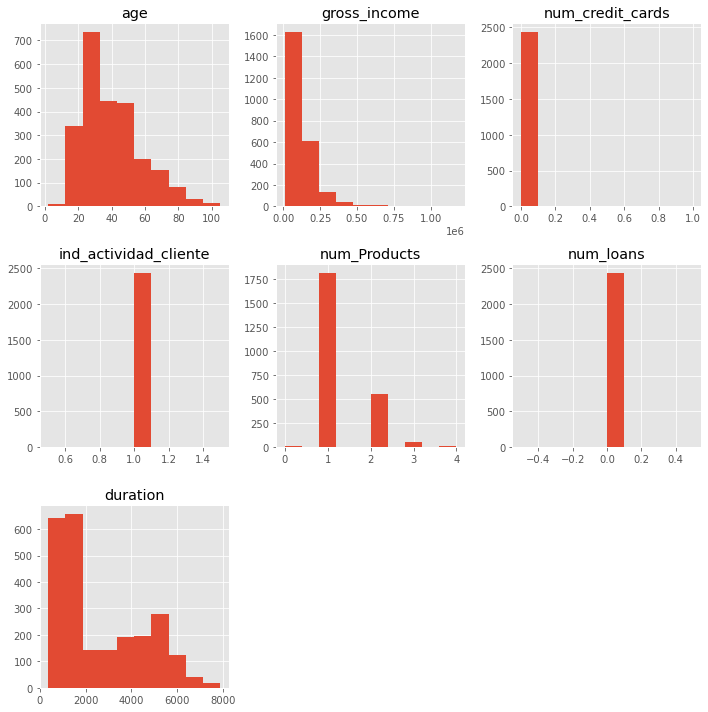

In [239]:
inactive_at_start_and_active_at_end_people.hist(figsize=(10,10))

### Task 2.5 - d _ Inactive at the start and inactive at the end :

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gross_income'}>,
        <AxesSubplot:title={'center':'num_credit_cards'}>],
       [<AxesSubplot:title={'center':'ind_actividad_cliente'}>,
        <AxesSubplot:title={'center':'num_Products'}>,
        <AxesSubplot:title={'center':'num_loans'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

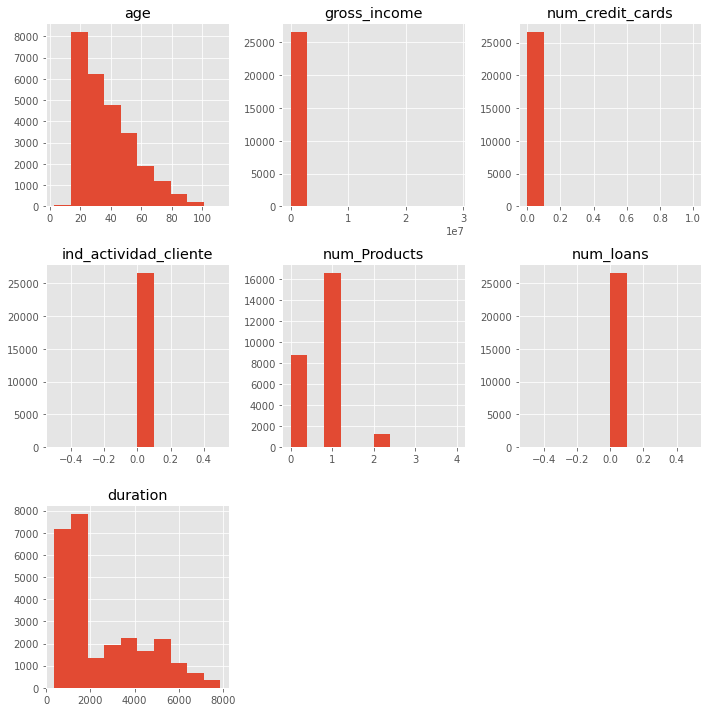

In [235]:
people_inactive_at_start_and_end.hist(figsize=(10,10))

_________________________________________________

### End of the Retention Analysis - Project - I
_________________________________________________